In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from matplotlib.lines import Line2D

orders = pd.read_csv("food_delivery_data_cleaned.csv")
customers = pd.read_csv("food_delivery_data_with_demographics_cleaned.csv")
food_orders = pd.read_csv("food_delivery_data_with_food_type_cleaned.csv")

df = orders.merge(customers.drop(columns=["OrderDate", "CustomerID"]), on="OrderID") \
           .merge(food_orders.drop(columns=["OrderDate", "CustomerID"]), on="OrderID")

df["OrderDate"] = pd.to_datetime(df["OrderDate"], format='mixed', dayfirst=True)


sns.set(style="whitegrid")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)




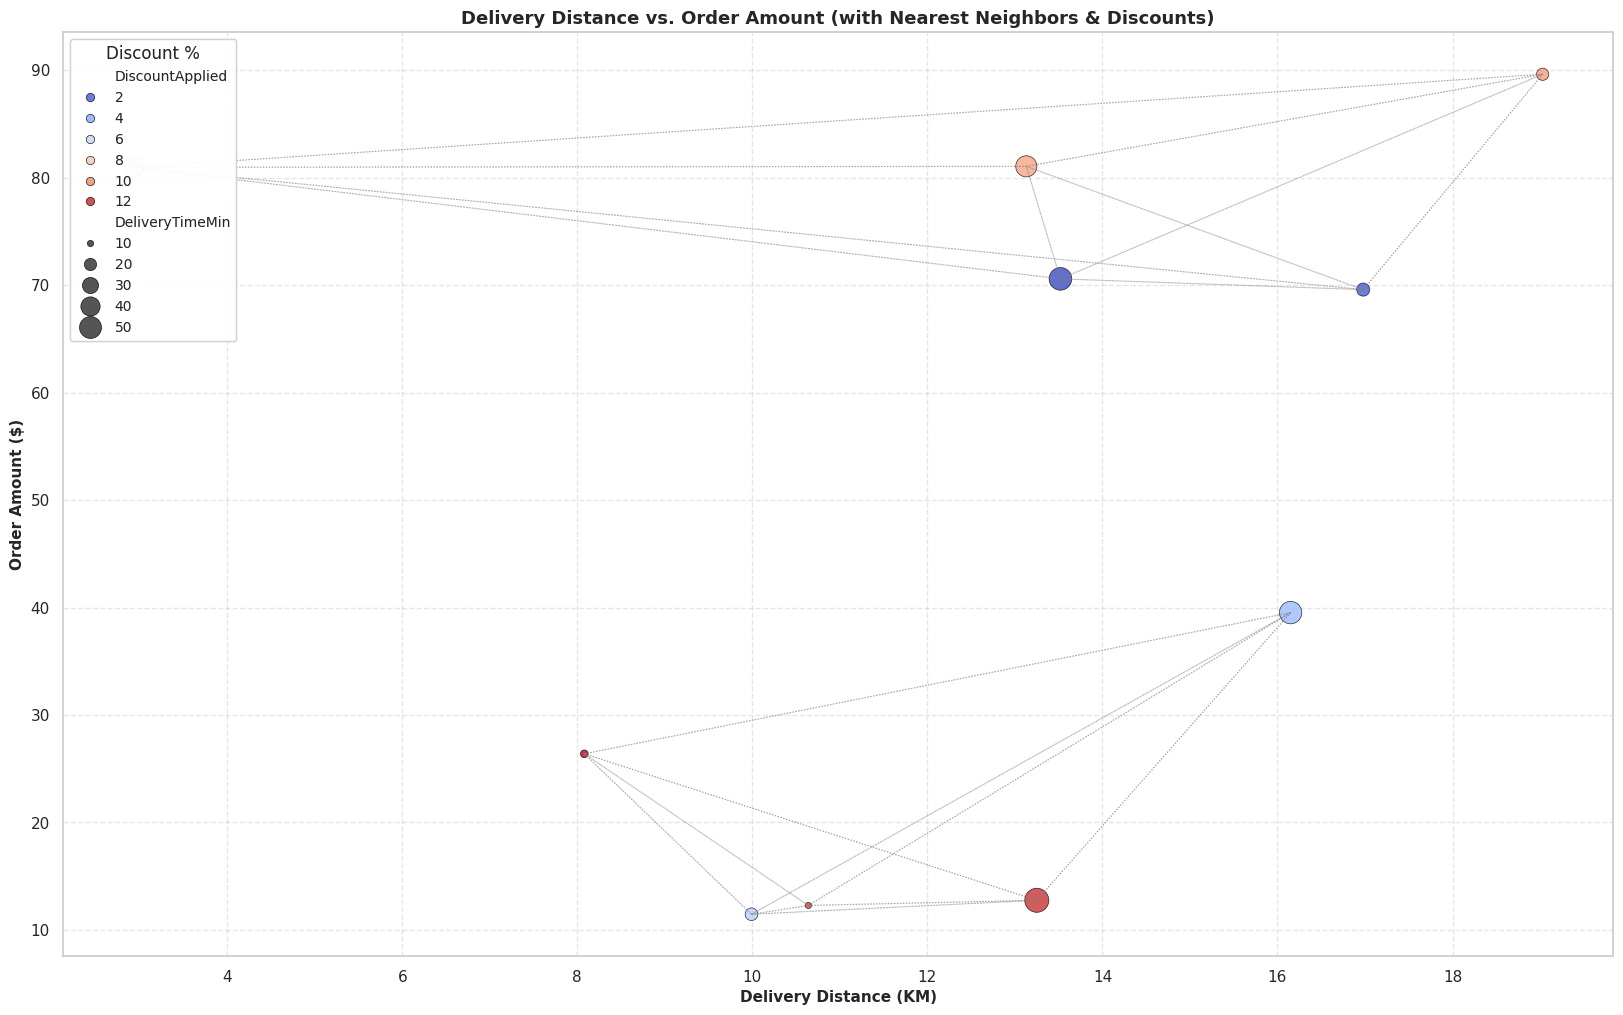

In [52]:
#📌 1. Delivery Distance & Cost

X = df[["DeliveryDistanceKM", "OrderAmount"]].values

knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)
distances, indices = knn.kneighbors(X)

plt.figure(figsize=(20, 12))

scatter = sns.scatterplot(
    data=df,
    x="DeliveryDistanceKM",
    y="OrderAmount",
    hue="DiscountApplied",
    size="DeliveryTimeMin",
    sizes=(20, 300),
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
    palette="coolwarm"
)

for i in range(len(df)):
    for neighbor in indices[i][1:]:
        plt.plot(
            [df.iloc[i]["DeliveryDistanceKM"], df.iloc[neighbor]["DeliveryDistanceKM"]],
            [df.iloc[i]["OrderAmount"], df.iloc[neighbor]["OrderAmount"]],
            color="gray", linestyle="dotted", linewidth=0.8, alpha=0.6
        )

discount_legend = plt.legend(title="Discount %", loc="upper left", fontsize=10)
plt.gca().add_artist(discount_legend)

plt.title("Delivery Distance vs. Order Amount (with Nearest Neighbors & Discounts)", fontsize=13, fontweight="bold")
plt.xlabel("Delivery Distance (KM)", fontsize=11, fontweight="bold")
plt.ylabel("Order Amount ($)", fontsize=11, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


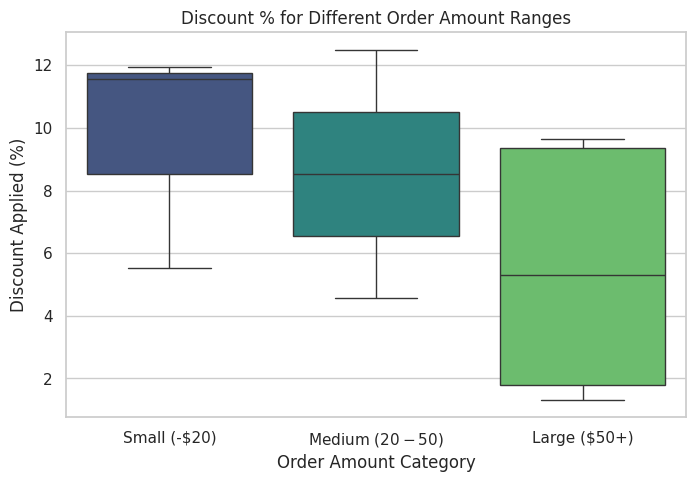

In [53]:
#📌 2. Order Amount & Discount Imbalance
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=pd.cut(df["OrderAmount"], bins=[0, 20, 50, 100], labels=["Small (-$20)", "Medium ($20-$50)", "Large ($50+)"]), y="DiscountApplied", palette="viridis")
plt.title("Discount % for Different Order Amount Ranges")
plt.xlabel("Order Amount Category")
plt.ylabel("Discount Applied (%)")
plt.show()

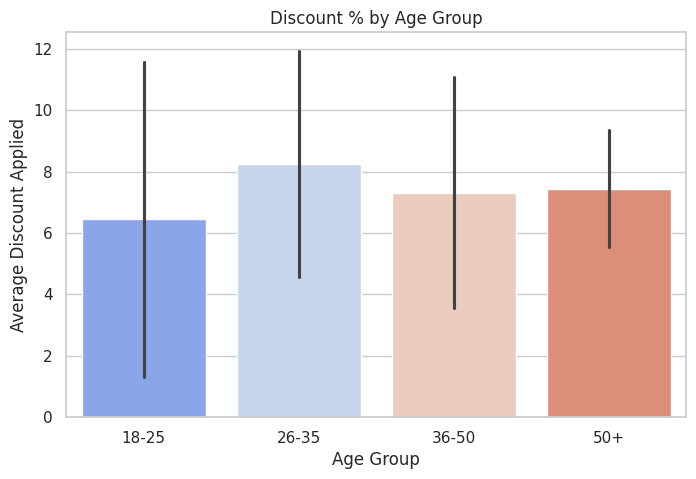

In [54]:

#📌 3. Demographics & Discount Sensitivity
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x=pd.cut(df["Age"], bins=[18, 25, 35, 50, 70], labels=["18-25", "26-35", "36-50", "50+"]), y="DiscountApplied", palette="coolwarm")
plt.title("Discount % by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Discount Applied")
plt.show()

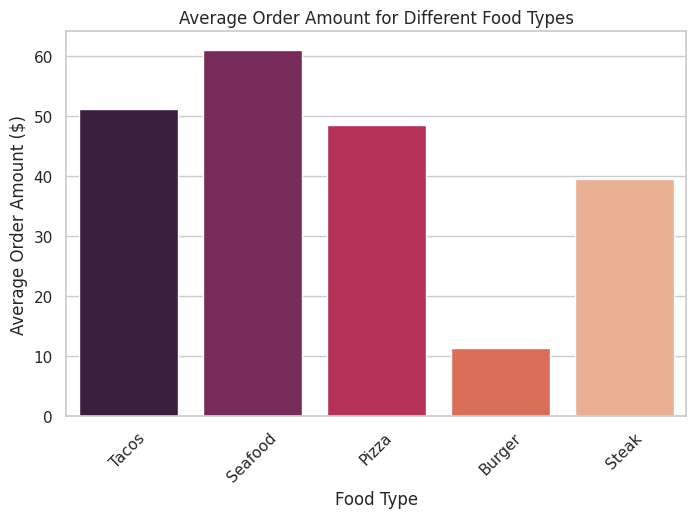

In [55]:


#📌 3. Food Type & Spending Patterns
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="FoodType", y="OrderAmount", ci=None, palette="rocket")
plt.xticks(rotation=45)
plt.title("Average Order Amount for Different Food Types")
plt.xlabel("Food Type")
plt.ylabel("Average Order Amount ($)")
plt.show()